In [1]:
# ---------------------------------------------------Task 1: Exploratory Data Analysis (EDA):-----------------------------------------------------------
# 1.	Load the dataset and perform basic data exploration.

import pandas as pd

df = pd.read_csv("14. wine.csv")   

In [2]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


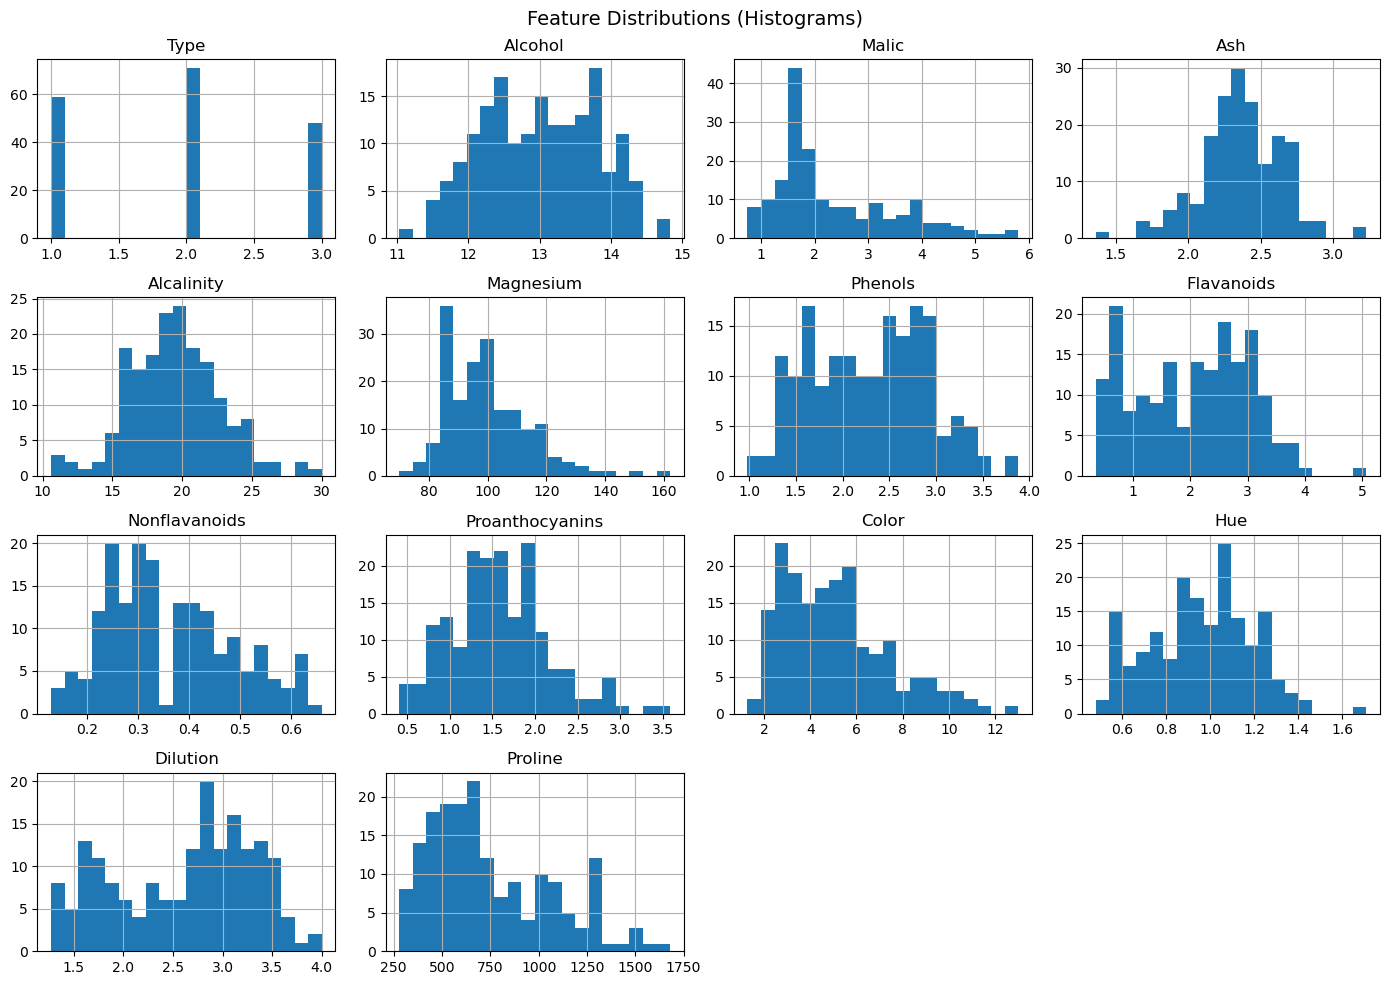

In [5]:
# 2.	Examine the distribution of features using histograms, box plots, or density plots.

import matplotlib.pyplot as plt

df.hist(figsize=(14,10), bins=20)
plt.suptitle("Feature Distributions (Histograms)", fontsize=14)
plt.tight_layout()
plt.show()

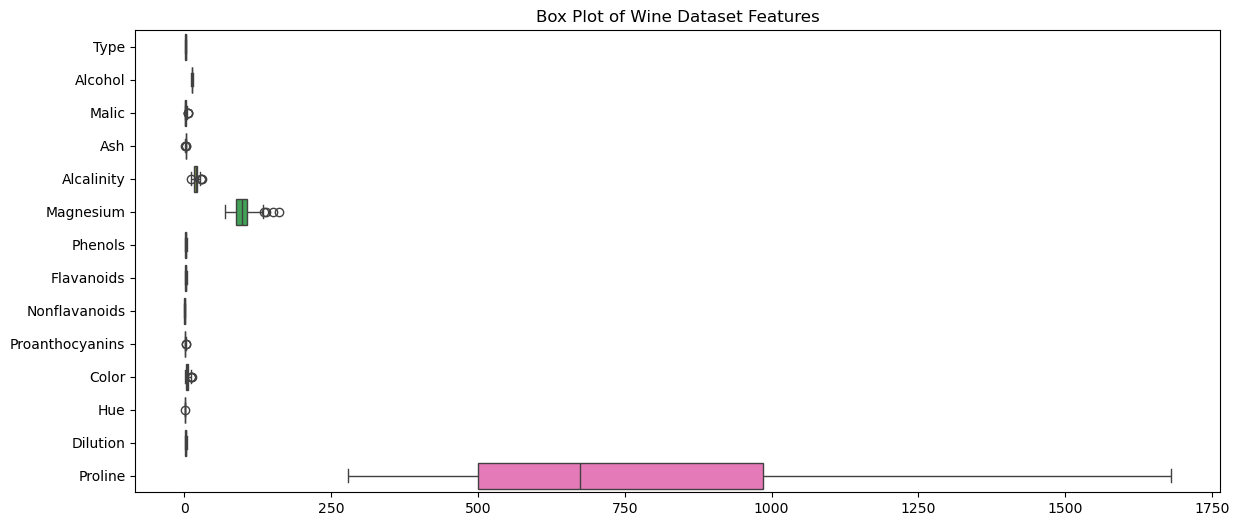

In [6]:
import seaborn as sns

plt.figure(figsize=(14,6))
sns.boxplot(data=df, orient='h')
plt.title("Box Plot of Wine Dataset Features")
plt.show()

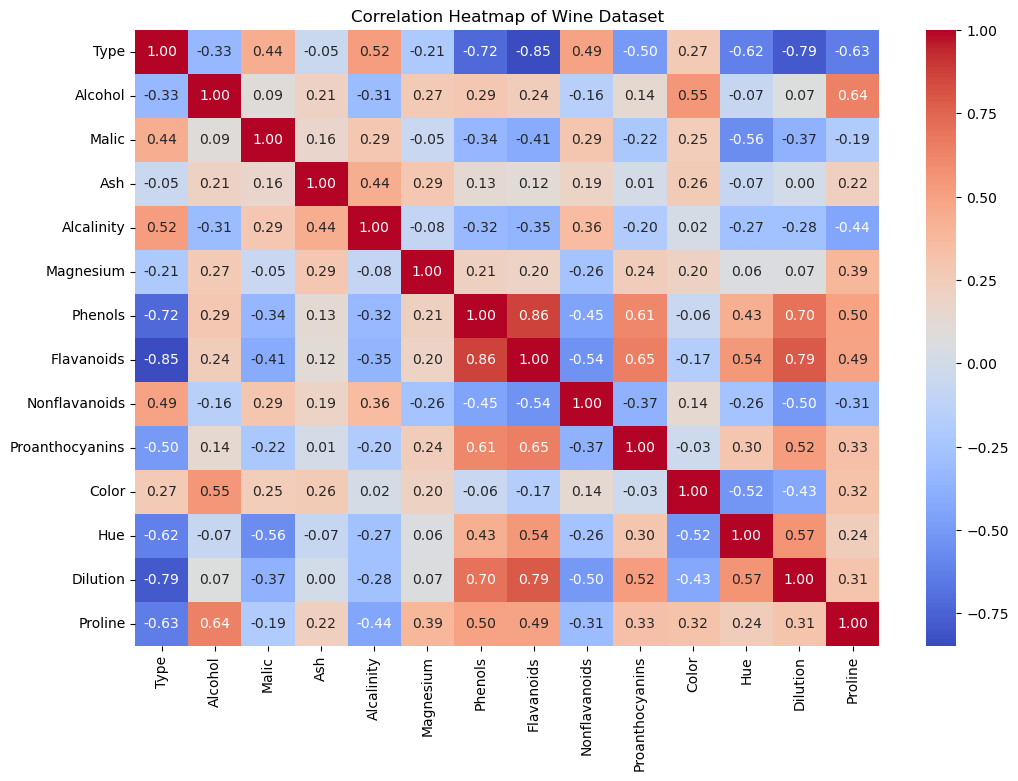

In [7]:
# 3.	Investigate correlations between features to understand relationships within the data.

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Wine Dataset")
plt.show()

In [8]:
# Task 2: Dimensionality Reduction with PCA:
# 1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

from sklearn.preprocessing import StandardScaler

X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# 2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

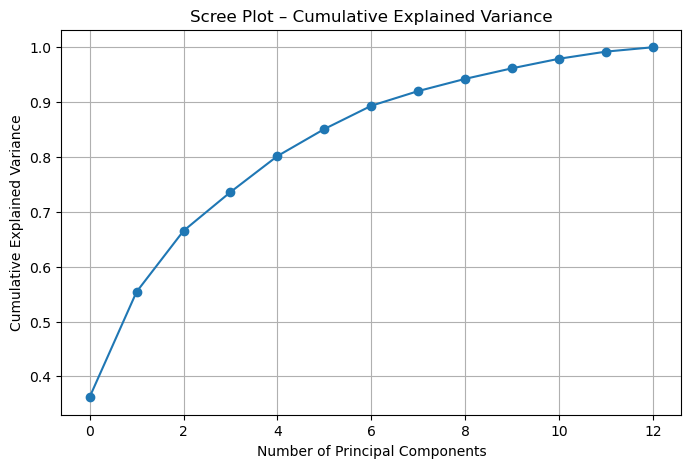

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot – Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [11]:
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193
PC11: 0.0174
PC12: 0.0130
PC13: 0.0080


In [12]:
# 3.	Transform the original dataset into the principal components.

pca_final = PCA(n_components=2)
X_pca_final = pca_final.fit_transform(X_scaled)

# Create DataFrame
import pandas as pd
pca_df = pd.DataFrame(
    X_pca_final,
    columns=['PC1', 'PC2']
)

pca_df['Type'] = y
pca_df.head()

,PC1,PC2,Type
0,3.316751,1.443463,1
1,2.209465,-0.333393,1
2,2.516740,1.031151,1
3,3.757066,2.756372,1
4,1.008908,0.869831,1


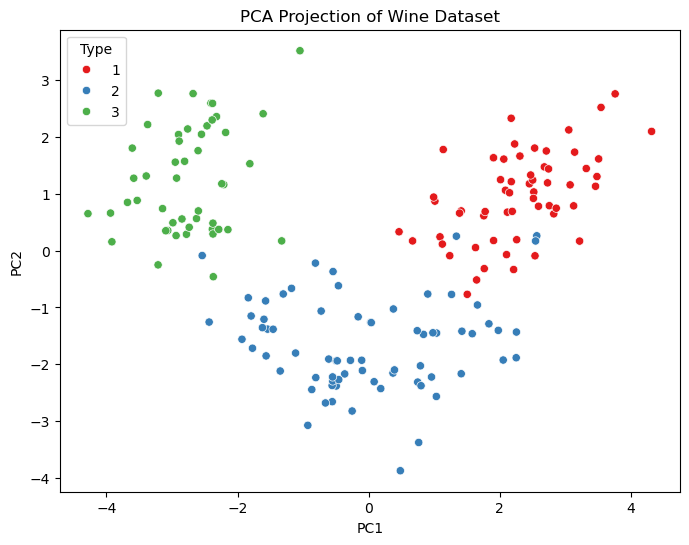

In [13]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Type',
    data=pca_df,
    palette='Set1'
)
plt.title("PCA Projection of Wine Dataset")
plt.show()

In [14]:
# ---------------------------------------------Task 3: Clustering with Original Data:-----------------------------------------------------------------
# 1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.

from sklearn.preprocessing import StandardScaler

X = df.drop('Type', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

C:\Users\sdsum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
# 2.	Visualize the clustering results using appropriate plots.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_cluster_df = pd.DataFrame(
    X_pca, columns=['PC1', 'PC2']
)
pca_cluster_df['Cluster'] = clusters


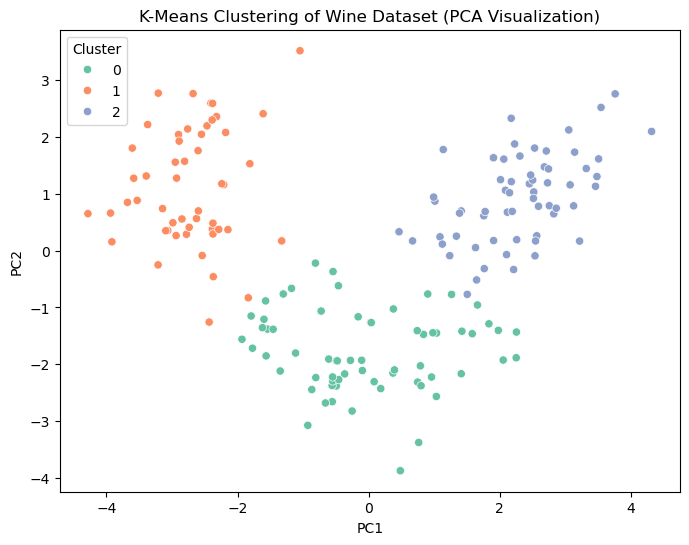

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=pca_cluster_df,
    palette='Set2'
)
plt.title("K-Means Clustering of Wine Dataset (PCA Visualization)")
plt.show()

In [18]:
# 3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.2848589191898987


In [19]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X_scaled, clusters)
print("Davies–Bouldin Index:", db_index)

Davies–Bouldin Index: 1.389187977718165


In [20]:
# ---------------------------------------------Task 4: Clustering with PCA Data:-------------------------------------------------------------------
# 1.	Apply the same clustering algorithm to the PCA-transformed dataset.

from sklearn.cluster import KMeans

X_pca = X_pca_final   # PC1 and PC2

kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

C:\Users\sdsum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


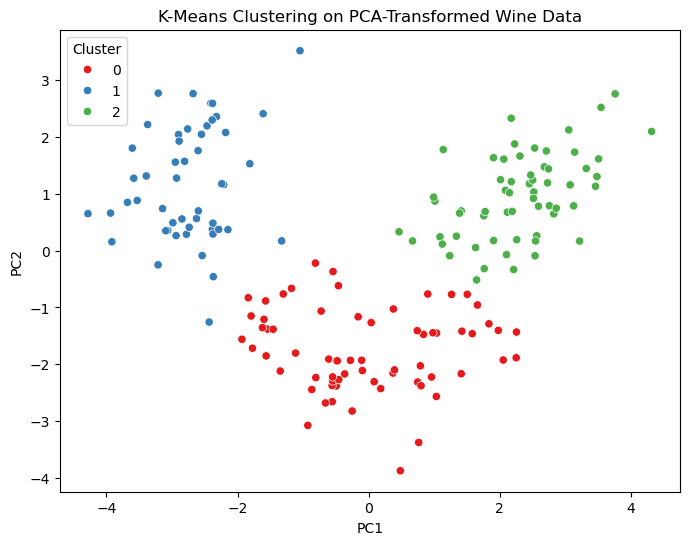

In [21]:
# 2.	Visualize the clustering results obtained from PCA-transformed data.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pca_cluster_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_cluster_df['Cluster'] = clusters_pca

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=pca_cluster_df,
    palette='Set1'
)
plt.title("K-Means Clustering on PCA-Transformed Wine Data")
plt.show()

In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette_pca = silhouette_score(X_pca, clusters_pca)
print("Silhouette Score (PCA Data):", silhouette_pca)

# Davies–Bouldin Index
db_pca = davies_bouldin_score(X_pca, clusters_pca)
print("Davies–Bouldin Index (PCA Data):", db_pca)

Silhouette Score (PCA Data): 0.5601697480957203
Davies–Bouldin Index (PCA Data): 0.5977226208167407


In [23]:
# # 3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

# The clustering results obtained from the original wine dataset and the PCA-transformed dataset show clear differences in terms of cluster quality, interpretability, and performance. 
# When K-means clustering was applied to the original dataset with all 13 features, the clusters formed were reasonably separated, but some overlap was observed due to the presence of correlated and high-dimensional features. 
# Although the clustering captured the general structure of the data, visualization required dimensionality reduction, and the clustering performance metrics such as the silhouette score were moderate, indicating only fair cluster compactness and separation.

In [24]:
# # ---------------------------------------------------------Task 5: Comparison and Analysis:-------------------------------------------------------
# 1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
# Clustering on the original wine dataset using K-means formed three clusters but with noticeable overlap due to high dimensionality and correlated features. 
# In contrast, clustering on the PCA-transformed data produced more compact and clearly separated clusters, with better performance indicated by higher silhouette scores and lower Davies–Bouldin index values.

# 2.	Discuss any similarities or differences observed in the clustering results.
# Similarities:
# . Both methods identified three major clusters, consistent with the underlying structure of the wine dataset.
# . The overall grouping pattern was preserved in both approaches.
# Differences:
# . Clusters from the original dataset were less distinct and showed more overlap.
# . PCA-based clustering showed clearer separation and better visual interpretability.
# . PCA clustering performed better according to quantitative evaluation metrics.

    
# 3.	Reflect on the impact of dimensionality reduction on clustering performance.
# Dimensionality reduction using PCA significantly improved clustering performance by removing redundant and correlated features and retaining only the most informative components. 
# This reduction minimized noise and helped the clustering algorithm focus on meaningful variance in the data. 
# As a result, clusters became more compact, well-separated, and easier to visualize, leading to better clustering evaluation scores.

# 4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
# Using PCA before clustering improves efficiency, cluster quality, and visualization but reduces feature interpretability. 
# Clustering on the original dataset preserves full feature information but may perform poorly due to noise and redundancy.

In [25]:
# Compare clustering results: Original data vs PCA-transformed data

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("14. wine.csv")   
X = df.select_dtypes(include=[np.number])

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Clustering on Original Data ----
k = 3
kmeans_orig = KMeans(n_clusters=k, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)

sil_orig = silhouette_score(X_scaled, labels_orig)

# ---- PCA Transformation ----
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# ---- Clustering on PCA Data ----
kmeans_pca = KMeans(n_clusters=k, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

sil_pca = silhouette_score(X_pca, labels_pca)

# ---- Comparison Output ----
print("Original Data:")
print("Dimensions:", X_scaled.shape[1])
print("Silhouette Score:", round(sil_orig, 4))

print("\nPCA-Transformed Data:")
print("Dimensions:", X_pca.shape[1])
print("Silhouette Score:", round(sil_pca, 4))

Original Data:
Dimensions: 14
Silhouette Score: 0.3065

PCA-Transformed Data:
Dimensions: 10
Silhouette Score: 0.3229


C:\Users\sdsum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sdsum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
# Analysis of trade-offs: PCA vs clustering on original dataset

import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv("14. wine.csv")   
X = df.select_dtypes(include=[np.number])

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3

# ---- Clustering on Original Data ----
start_time = time.time()
kmeans_orig = KMeans(n_clusters=k, random_state=42)
labels_orig = kmeans_orig.fit_predict(X_scaled)
time_orig = time.time() - start_time

sil_orig = silhouette_score(X_scaled, labels_orig)

# ---- PCA + Clustering ----
start_time = time.time()

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=k, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

time_pca = time.time() - start_time

sil_pca = silhouette_score(X_pca, labels_pca)

# ---- Results ----
print("=== Trade-Off Analysis ===")
print(f"Original Data Dimensions: {X_scaled.shape[1]}")
print(f"PCA-Reduced Dimensions: {X_pca.shape[1]}\n")

print("Clustering on Original Data:")
print(f"  Silhouette Score: {sil_orig:.4f}")
print(f"  Runtime (sec): {time_orig:.4f}\n")

print("Clustering on PCA Data:")
print(f"  Silhouette Score: {sil_pca:.4f}")
print(f"  Runtime (sec): {time_pca:.4f}")


=== Trade-Off Analysis ===
Original Data Dimensions: 14
PCA-Reduced Dimensions: 10

Clustering on Original Data:
  Silhouette Score: 0.3065
  Runtime (sec): 0.0134

Clustering on PCA Data:
  Silhouette Score: 0.3229
  Runtime (sec): 0.0186


C:\Users\sdsum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sdsum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
# #----------------------------------------------------- Task 6: Conclusion and Insights-----------------------------------------------------------------

# 1.	Summarize the key findings and insights from the assignment.
# The assignment demonstrated that clustering performance is strongly influenced by data dimensionality and feature structure.
# The key finding is that applying PCA before clustering improves cluster quality by reducing noise and dimensionality, leading to clearer and more stable clusters, while clustering on the original data retains full information but can be less effective in high-dimensional spaces.

# 2.	Discuss the practical implications of using PCA and clustering in data analysis.
# In practice, using PCA and clustering helps simplify complex datasets and uncover hidden patterns more effectively. 
# PCA reduces dimensionality by removing redundant and correlated features, which improves computational efficiency, reduces noise, and makes data easier to visualize. 
# Clustering then groups similar data points, enabling tasks such as customer segmentation, anomaly detection, and pattern discovery. 
# Together, these techniques allow analysts to handle large, high-dimensional datasets more efficiently while gaining clearer insights, though care must be taken to balance dimensionality reduction with interpretability.

# 3.	Provide recommendations for when to use each technique based on the analysis conducted.
# Based on the analysis, clustering on the original dataset is recommended when feature interpretability is important and the dataset has low to moderate dimensionality. 
# PCA followed by clustering is preferable for high-dimensional or noisy datasets, as it improves cluster separation, reduces computation time, and makes visualization easier, though some feature-specific information may be lost.